# Project 2021
## Raul Sainz
## 19158696
#### MSc in Data Analytics 2021 
#### National College of Ireland 
#### Dublin, Ireland 
#### x19158696@student.ncirl.ie
#### Module: Statistics for Data Analytics (MSCDAD_JAN21A_I)
#### Lecturer: Tony Denaley


# PART B (Logistic Regression)
Choose or create an appropriate dichotomous variable from the data and estimate and report on a suitable binary logistic regression model to classify the cases in respect of the chosen dependent variable. 
<br>Use PCA or an alternative dimension reduction technique if you consider it necessary. 

### Your report should incorporate: 
- Descriptive statistics and appropriate visualisations to enhance understanding of the variables used.
- Details of the model building steps you undertook in the process of arriving at your final model. Reasons for rejection of intermediate models should be explained clearly. 
- Appropriate diagnostics and an assessment of model fit. 
- A succinct summary of the parameters of your final model explaining the inclusion and influence of the independent variables.
## Dataset #1: Child Births
The file  contains data on childbirths in a US city.
## Variable Description
| Name             | Variable                                      | Data type |
|------------------|-----------------------------------------------|-----------|
| ID               | Baby number                                   |           |
| length           | Length of baby (cm)                           | Scale     |
| Birthweight      | Weight of baby (kg)                           | Scale     |
| headcirumference | Head Circumference                            | Scale     |
| Gestation        | Gestation (weeks)                             | Scale     |
| smoker           | Mother smokes 1 = smoker 0 = non-smoker       | Binary    |
| motherage        | Maternal age                                  | Scale     |
| mnocig           | Number of cigarettes smoked per day by mother | Scale     |
| mheight          | Mothers height (cm)                           | Scale     |
| mppwt            | Mothers pre-pregnancy weight (kg)             | Scale     |
| fage             | Father's age                                  | Scale     |
| fedyrs           | Father’s years in education                   | Scale     |
| fnocig           | Number of cigarettes smoked per day by father | Scale     |
| fheight          | Father's height (kg)                          | Scale     |
| lowbwt           | Low birth weight, 0 = No and 1 = yes          | Binary    |
| mage35           | Mother over 35, 0 = No and 1 = yes            | Binary    |

In [1]:
#Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Allows to reload custom module modifications
%load_ext autoreload
%autoreload 2
from  myFuntcions import models  # Custom  misc functions

In [3]:
#Define initial model parameters
cv_n_split = 5
random_state = 42
test_train_split = 0.25
sample = True
sample_size = 0.1

In [4]:
#Setup  Plotting enviroment
sns.set()
sns.set_context('notebook',rc={"grid.linewidth": 5})
sns.set_style("whitegrid")
colors = ["#5998B1","#406F82","#264653","#287271","#2a9d8f","#8AB17D","#E9C46A","#EFB366","#F4A261","#E76F51","#C53D1B","#923B26"]
#colors = ["#345E6F","#264653","#287271","#2a9d8f","#e9c46a","#efb366","#f4a261","#ee8959","#e76f51","#e87153","#e97c61", '#902C14']
f_colors = ["#E76F51","#F4A261","#E9C46A","#2A9D8F","#264653","#406F82"]
bin_colors = ["#0081a7","#f07167"]
#bin_colors = ["#2A9D8F","#264653"]
sns.set_palette(sns.color_palette(colors))
mul_palette = sns.color_palette(f_colors)
bin_palette = sns.color_palette(bin_colors)
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8','grid.linestyle': '--'})

In [5]:
bin_palette

[(0.0, 0.5058823529411764, 0.6549019607843137),
 (0.9411764705882353, 0.44313725490196076, 0.403921568627451)]

# Data Selection and Cleaning

In [6]:
df = pd.read_csv("datasets/Childbirths.csv")
print ("Imported {} observations and {} variables".format(df.shape[0],df.shape[1]))

Imported 42 observations and 16 variables


In [7]:
#Review dataframe columns summary for diagnostics and cleaning
pd.DataFrame({ 
            'Data type':df.dtypes,
            'unicos':df.nunique(),
            'count': df.count(),
            'missing total': df.isna().sum(),
            'missing %': (df.isna().sum()/df.shape[0])*100,
            'type':df.dtypes})

Data type  unicos  count  missing total  missing %     type
ID              int64      42     42              0        0.0    int64
Length          int64      12     42              0        0.0    int64
Birthweight   float64      41     42              0        0.0  float64
Headcirc        int64       9     42              0        0.0    int64
Gestation       int64      11     42              0        0.0    int64
smoker          int64       2     42              0        0.0    int64
mage            int64      17     42              0        0.0    int64
mnocig          int64       8     42              0        0.0    int64
mheight         int64      23     42              0        0.0    int64
mppwt           int64      22     42              0        0.0    int64
fage            int64      20     42              0        0.0    int64
fedyrs          int64       4     42              0        0.0    int64
fnocig          int64       7     42              0        0.0    int64
fheight         int64      21     42              0        0.0    int64
lowbwt          int64       2     42              0        0.0    int64
mage35          int64       2     42              0        0.0    int64

In [8]:
df.head()

ID  Length  Birthweight  Headcirc  Gestation  smoker  mage  mnocig  \
0  1360      56         4.55        34         44       0    20       0   
1  1016      53         4.32        36         40       0    19       0   
2   462      58         4.10        39         41       0    35       0   
3  1187      53         4.07        38         44       0    20       0   
4   553      54         3.94        37         42       0    24       0   

   mheight  mppwt  fage  fedyrs  fnocig  fheight  lowbwt  mage35  
0      162     57    23      10      35      179       0       0  
1      171     62    19      12       0      183       0       0  
2      172     58    31      16      25      185       0       1  
3      174     68    26      14      25      189       0       0  
4      175     66    30      12       0      184       0       0

In [9]:
len(df.columns)

16

In [10]:
#Drop non-usable columns
df.drop(['ID'],axis='columns', inplace=True)

# Exploratory Data Analysis

In [11]:
df.describe()

Length  Birthweight   Headcirc  Gestation     smoker       mage  \
count  42.000000    42.000000  42.000000  42.000000  42.000000  42.000000   
mean   51.333333     3.312857  34.595238  39.190476   0.523810  25.547619   
std     2.935624     0.603895   2.399792   2.643336   0.505487   5.666342   
min    43.000000     1.920000  30.000000  33.000000   0.000000  18.000000   
25%    50.000000     2.940000  33.000000  38.000000   0.000000  20.250000   
50%    52.000000     3.295000  34.000000  39.500000   1.000000  24.000000   
75%    53.000000     3.647500  36.000000  41.000000   1.000000  29.000000   
max    58.000000     4.570000  39.000000  45.000000   1.000000  41.000000   

          mnocig     mheight      mppwt       fage     fedyrs     fnocig  \
count  42.000000   42.000000  42.000000  42.000000  42.000000  42.000000   
mean    9.428571  164.452381  57.500000  28.904762  13.666667  17.190476   
std    12.511737    6.504041   7.198408   6.863866   2.160247  17.308165   
min     0.000000  149.000000  45.000000  19.000000  10.000000   0.000000   
25%     0.000000  161.000000  52.250000  23.000000  12.000000   0.000000   
50%     4.500000  164.500000  57.000000  29.500000  14.000000  18.500000   
75%    15.750000  169.500000  62.000000  32.000000  16.000000  25.000000   
max    50.000000  181.000000  78.000000  46.000000  16.000000  50.000000   

          fheight     lowbwt     mage35  
count   42.000000  42.000000  42.000000  
mean   180.500000   0.142857   0.095238  
std      6.978189   0.354169   0.297102  
min    169.000000   0.000000   0.000000  
25%    175.250000   0.000000   0.000000  
50%    180.500000   0.000000   0.000000  
75%    184.750000   0.000000   0.000000  
max    200.000000   1.000000   1.000000

In [12]:
df['lowbwt'].value_counts(normalize=True)

0    0.857143
1    0.142857
Name: lowbwt, dtype: float64

In [13]:
df['smoker'].value_counts(normalize=True)

1    0.52381
0    0.47619
Name: smoker, dtype: float64

In [14]:
df['mage35'].value_counts(normalize=True)

0    0.904762
1    0.095238
Name: mage35, dtype: float64

0
0 0
1
1 0
2
2 0


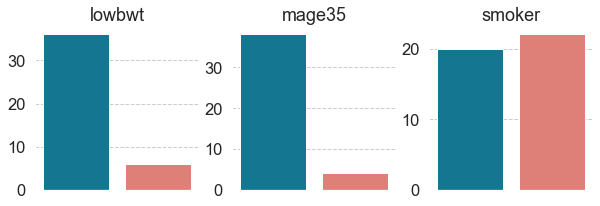

In [15]:
cols = 3
rows = 1
columns = ['lowbwt','mage35','smoker']
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(10,3))
for i in range (cols):
    for j in range(rows):
        index = i*rows+j
        print(index)
        print(i,j)
        if index < len(columns):
            sns.countplot(x = columns[i*rows+j],  data = df,palette = bin_palette, ax=axs[index])
            axs[index].set(ylabel="",xlabel = '',title = columns[i*rows+j])
            axs[index].axes.yaxis.set_visible(True)
            axs[index].axes.xaxis.set_visible(False)
            axs[index].set_xticklabels(['No','Yes'])


In [16]:
dv = 'smoker'
dv_labels = [ 'No','Yes']
#dv_labels = [ 'Low','Normal']

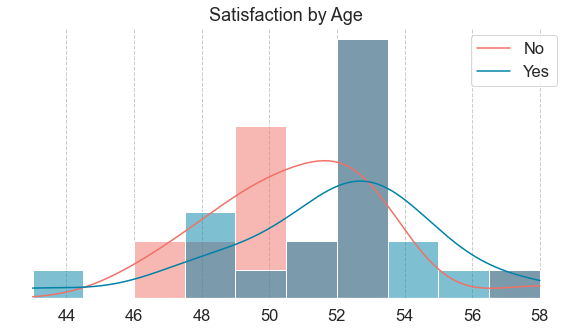

In [17]:

ax = sns.histplot(data=df, x="Length", hue=dv,kde=True,bins=10,palette=bin_palette)

ax.set(xlabel = "",title = 'Satisfaction by Age')
#set legends friendly name
ax.legend(dv_labels)
#Hide Y labels
ax.axes.yaxis.set_visible(False)

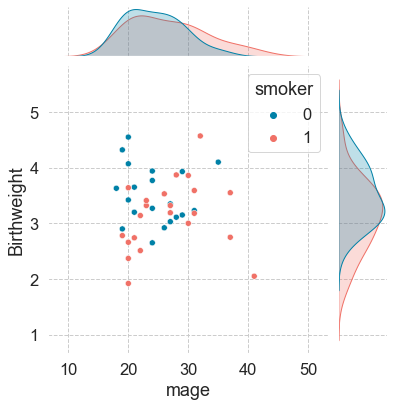

In [18]:
#fig.suptitle('Birthweight and Lenght')
ax = sns.jointplot(data=df, x="mage", y="Birthweight",hue=dv,palette=bin_palette)
#ax.legend(y1_labels)
#ax[0].legend(y1_labels)

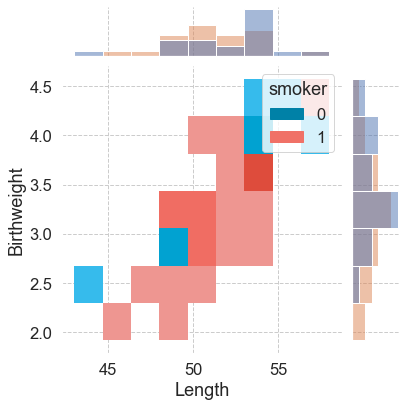

In [19]:
ax = sns.jointplot(data=df, x="Length", y="Birthweight",hue=dv,kind="hist",palette=bin_palette)

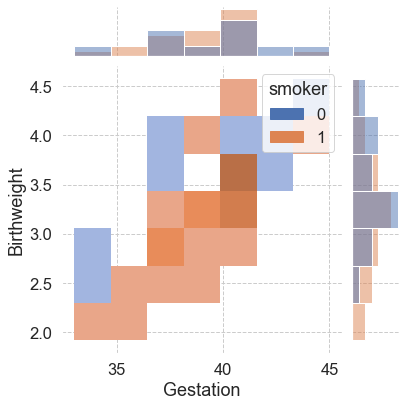

In [20]:
ax = sns.jointplot(data=df, x="Gestation", y="Birthweight",hue=dv,kind="hist")

<AxesSubplot:xlabel='Length', ylabel='Count'>

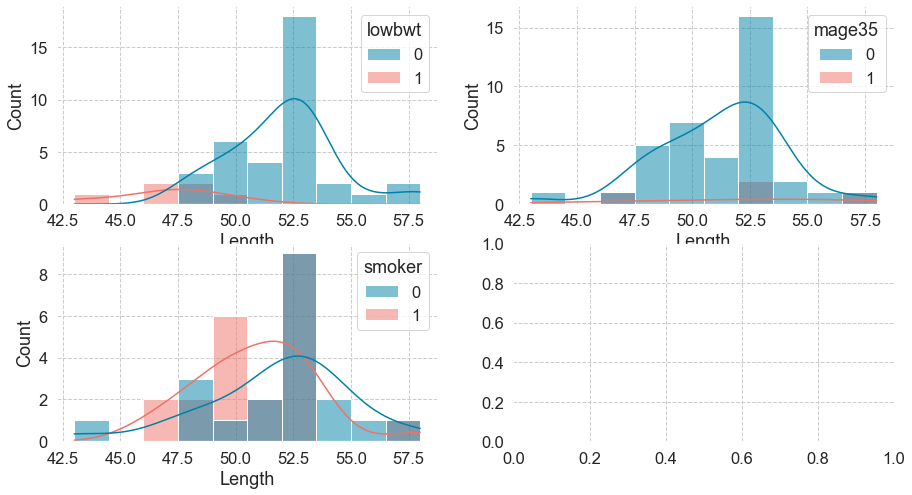

In [21]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(15,8))
sns.histplot(data=df, x="Length", hue="lowbwt",kde=True,bins=10,palette=bin_palette,ax = ax[0,0])
sns.histplot(data=df, x="Length", hue="mage35",kde=True,bins=10,palette=bin_palette,ax = ax[0,1])
sns.histplot(data=df, x="Length", hue="smoker",kde=True,bins=10,palette=bin_palette,ax = ax[1,0])
#sns.histplot(data=df, x="Length", hue="lowbwt",kde=True,bins=10,palette=bin_palette,ax = ax[1,1])


<AxesSubplot:xlabel='smoker', ylabel='Gestation'>

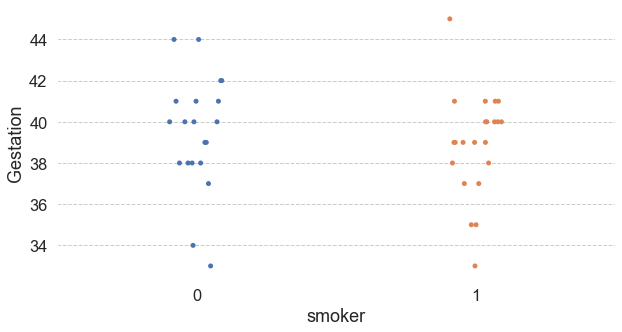

In [22]:
sns.stripplot(x="smoker", y="Gestation", data=df, jitter=True)

In [23]:
#sns.pairplot(df,hue=y,corner=True)

In [24]:
columns = df.columns.difference([dv])

In [25]:
len(columns)

14

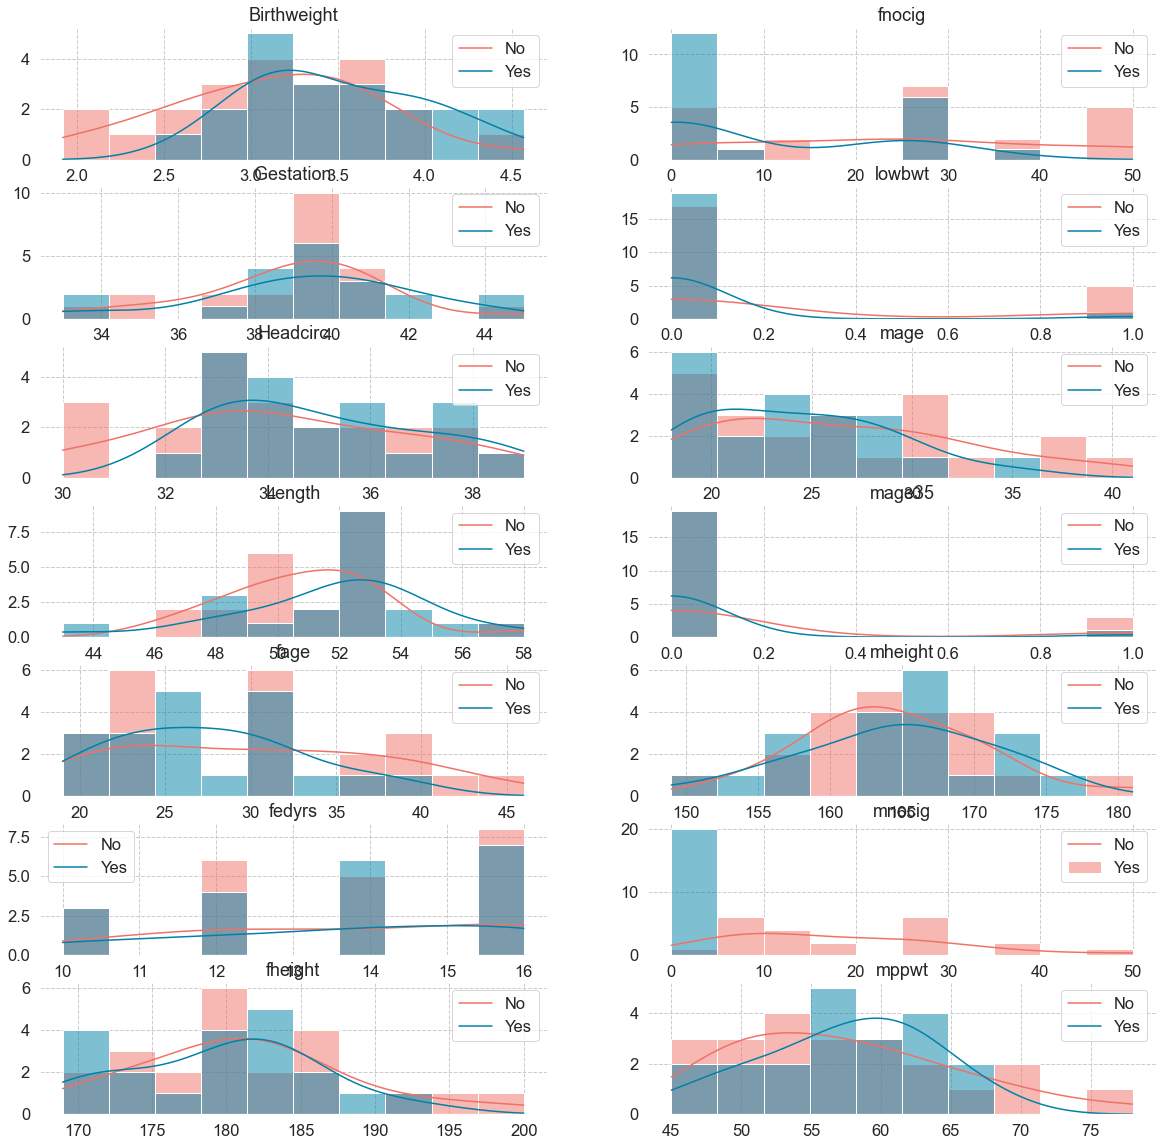

In [26]:
cols = 2
rows = 7
bins = 10
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(20,20))
for i in range (cols):
    for j in range(rows):
        index = i*rows+j
        if index < len(columns):
            sns.histplot(data=df, x=columns[i*rows+j],kde=True,bins=bins,palette=bin_palette,ax=axs[j,i],hue=dv)
            axs[j,i].set(ylabel="",xlabel = '',title = columns[i*rows+j])
            axs[j,i].axes.yaxis.set_visible(True)
            axs[j,i].axes.xaxis.set_visible(True)
            axs[j,i].legend(dv_labels)

# Checking for outliers

In [ ]:
df

In [27]:
df[['mppwt','mheight','Length','Birthweight']]

mppwt  mheight  Length  Birthweight
0      57      162      56         4.55
1      62      171      53         4.32
2      58      172      58         4.10
3      68      174      53         4.07
4      66      175      54         3.94
5      61      165      51         3.93
6      50      157      52         3.77
7      61      165      53         3.65
8      50      172      54         3.63
9      48      157      50         3.42
10     62      164      53         3.35
11     53      168      51         3.27
12     57      164      52         3.23
13     55      155      53         3.20
14     60      167      53         3.15
15     54      158      48         3.11
16     62      162      48         3.03
17     64      167      48         2.92
18     57      165      53         2.90
19     45      149      43         2.65
20     59      170      53         3.64
21     53      160      51         3.14
22     60      165      50         2.78
23     52      159      50         2.51
24     47      163      48         2.37
25     57      166      46         2.05
26     50      161      48         1.92
27     70      173      58         4.57
28     49      163      53         3.59
29     48      152      49         3.32
30     64      165      52         3.00
31     48      157      51         3.32
32     53      156      50         2.74
33     54      163      50         3.87
34     78      170      52         3.86
35     66      161      53         3.55
36     62      170      52         3.53
37     69      181      52         3.41
38     57      162      49         3.18
39     51      163      53         3.19
40     57      170      47         2.66
41     61      168      53         2.75

In [28]:
df[['mheight','Length','Birthweight']]


mheight  Length  Birthweight
0       162      56         4.55
1       171      53         4.32
2       172      58         4.10
3       174      53         4.07
4       175      54         3.94
5       165      51         3.93
6       157      52         3.77
7       165      53         3.65
8       172      54         3.63
9       157      50         3.42
10      164      53         3.35
11      168      51         3.27
12      164      52         3.23
13      155      53         3.20
14      167      53         3.15
15      158      48         3.11
16      162      48         3.03
17      167      48         2.92
18      165      53         2.90
19      149      43         2.65
20      170      53         3.64
21      160      51         3.14
22      165      50         2.78
23      159      50         2.51
24      163      48         2.37
25      166      46         2.05
26      161      48         1.92
27      173      58         4.57
28      163      53         3.59
29      152      49         3.32
30      165      52         3.00
31      157      51         3.32
32      156      50         2.74
33      163      50         3.87
34      170      52         3.86
35      161      53         3.55
36      170      52         3.53
37      181      52         3.41
38      162      49         3.18
39      163      53         3.19
40      170      47         2.66
41      168      53         2.75

In [29]:
df[df.columns.difference(['lowbwt','mage35'])]

Birthweight  Gestation  Headcirc  Length  fage  fedyrs  fheight  fnocig  \
0          4.55         44        34      56    23      10      179      35   
1          4.32         40        36      53    19      12      183       0   
2          4.10         41        39      58    31      16      185      25   
3          4.07         44        38      53    26      14      189      25   
4          3.94         42        37      54    30      12      184       0   
5          3.93         38        38      51    31      16      180       0   
6          3.77         40        34      52    31      16      173       0   
7          3.65         42        33      53    21      10      185      25   
8          3.63         38        38      54    20      12      172       7   
9          3.42         38        35      50    22      14      179       0   
10         3.35         41        33      53    37      14      170       0   
11         3.27         40        36      51    29      16      181       0   
12         3.23         38        36      52    35      16      183       0   
13         3.20         41        33      53    25      14      183      25   
14         3.15         40        34      53    30      16      182      25   
15         3.11         37        33      48    39      10      171       0   
16         3.03         39        35      48    27      14      178       0   
17         2.92         34        33      48    25      12      175      25   
18         2.90         39        34      53    23      14      193       2   
19         2.65         33        32      43    26      16      169       0   
20         3.64         40        38      53    24      12      185      12   
21         3.14         41        33      51    24      16      176      12   
22         2.78         37        30      50    20      14      183       0   
23         2.51         39        35      50    23      14      200      25   
24         2.37         37        30      48    20      10      185      35   
25         2.05         35        32      46    37      14      173      25   
26         1.92         33        30      48    20      10      180      35   
27         4.57         41        39      58    38      14      180      25   
28         3.59         40        34      53    41      12      191      50   
29         3.32         40        36      49    37      12      170      25   
30         3.00         38        35      52    38      14      180      50   
31         3.32         39        38      51    32      12      169      25   
32         2.74         39        33      50    24      12      179       7   
33         3.87         45        33      50    30      16      183       0   
34         3.86         39        36      52    40      16      178      50   
35         3.55         41        37      53    46      16      175       0   
36         3.53         40        37      52    30      10      181      25   
37         3.41         39        33      52    23      16      181       2   
38         3.18         38        34      49    32      16      194      50   
39         3.19         41        34      53    31      16      185      25   
40         2.66         35        33      47    23      12      186      50   
41         2.75         40        32      53    31      16      173       0   

    mage  mheight  mnocig  mppwt  smoker  
0     20      162       0     57       0  
1     19      171       0     62       0  
2     35      172       0     58       0  
3     20      174       0     68       0  
4     24      175       0     66       0  
5     29      165       0     61       0  
6     24      157       0     50       0  
7     21      165       0     61       0  
8     18      172       0     50       0  
9     20      157       0     48       0  
10    27      164       0     62       0  
11    24      168       0     53       0  
12    31      164       0     57       0  
13  

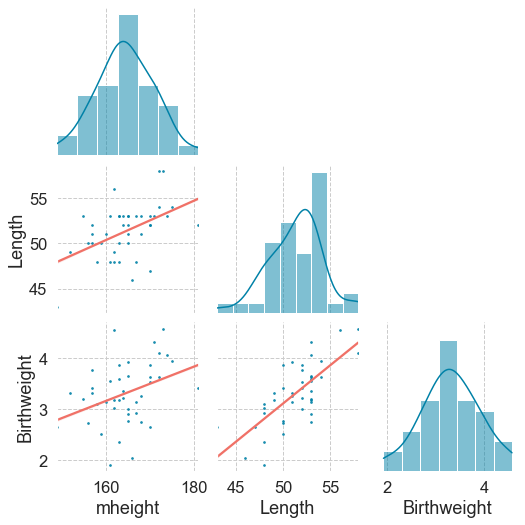

In [30]:
markers = {"Lunch": "s", "Dinner": "X"}
#sns.pairplot(data= df[df.columns.difference(['lowbwt','mage35'])],palette=bin_palette,kind='reg',diag_kind='kde',corner=True,plot_kws=dict(marker="+", linewidth=1),diag_kws=dict(fill=False),)
plot_kws = {
    'ci':10,
    #'marker':"x",
    'color':bin_colors[1],
    'scatter_kws':{
        'color':bin_colors[0],
        's':3
        }
}
diag_kws={
    'color':bin_colors[0],
    'kde':True
}
ax = sns.pairplot(data= df[['mheight','Length','Birthweight']],palette=bin_palette,kind='reg',diag_kind='hist',corner=True,plot_kws=plot_kws,diag_kws=diag_kws)
#ax.set(xlabel = "",title = 'Variable Pairplot')
#set legends friendly name
#ax.legend(dv_labels)
#Hide Y labels
#ax.axes.yaxis.set_visible(False)

In [ ]:
plot_kws = {
    'ci':50
}
ax = sns.pairplot(data= df[df.columns.difference(['lowbwt','mage35'])],palette=bin_palette,kind='reg',diag_kind='kde',corner=False,hue=dv,plot_kws=plot_kws)

In [ ]:
columns = list(columns)
columns.remove('lowbwt')
columns.remove('mage35')

In [173]:
columns

Index(['Birthweight', 'Gestation', 'Headcirc', 'Length', 'fage', 'fedyrs',
       'fheight', 'fnocig', 'lowbwt', 'mage', 'mage35', 'mheight', 'mnocig',
       'mppwt'],
      dtype='object')

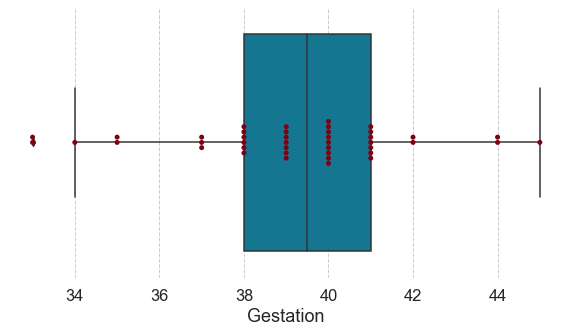

In [171]:
ax = sns.boxplot(x='Gestation', data = df,palette=bin_palette)
ax = sns.swarmplot(x="Gestation", data=df, color='#7d0013')

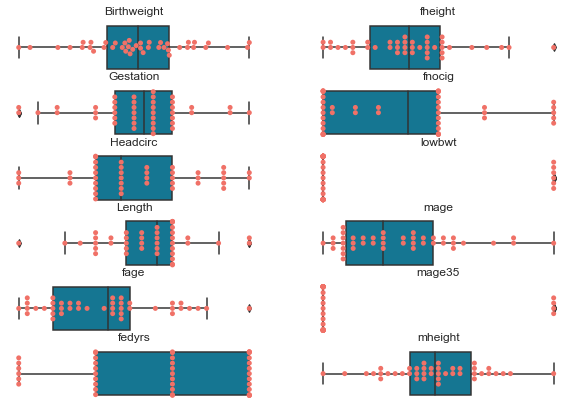

In [35]:
cols = 2
rows = 6
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(10,7))
for i in range (cols):
    for j in range(rows):
        index = i*rows+j
        if index < len(columns):
            sns.boxplot(x=columns[i*rows+j], data = df,ax=axs[j,i],color=bin_palette[0])
            sns.swarmplot(x=columns[i*rows+j], data = df,ax=axs[j,i],color=bin_palette[1])
            axs[j,i].set( xlabel= "",title = '')
            axs[j,i].set_title(columns[i*rows+j],fontsize=12)
            axs[j,i].axes.yaxis.set_visible(True)
            axs[j,i].axes.xaxis.set_visible(False)

In [ ]:
bin_colors[0]

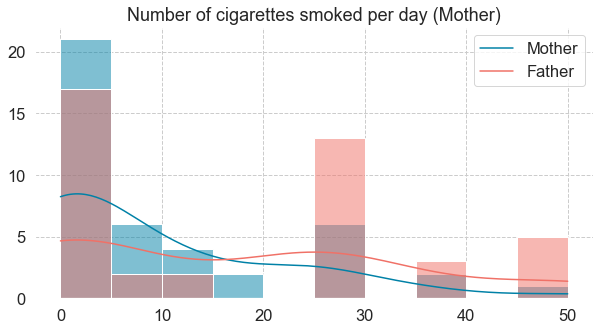

In [36]:

ax = sns.histplot(data=df, x="mnocig",kde=True,bins=10,color=bin_colors[0])
ax = sns.histplot(data=df, x="fnocig",kde=True,bins=10,color=bin_colors[1])
ax.set(xlabel = "",ylabel='',title = 'Number of cigarettes smoked per day (Mother)')
#set legends friendly name
ax.legend(['Mother', 'Father'])
#Hide Y labels
ax.axes.yaxis.set_visible(True)

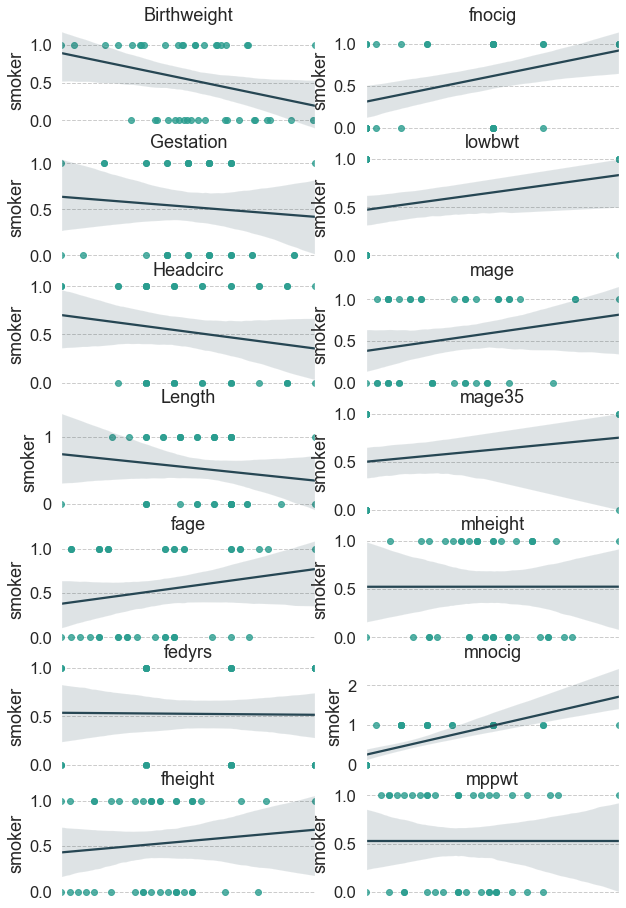

In [37]:
cols = 2
rows = 7
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(10,16))
for i in range (cols):
    for j in range(rows):
        index = i*rows+j
        if index < len(columns):
            sns.regplot(x=columns[i*rows+j], y = dv, data = df,ax=axs[j,i],scatter_kws={"color": "#2A9D8F"}, line_kws={"color": "#264653"})
            axs[j,i].set(xlabel = "",title = columns[i*rows+j])
            axs[j,i].axes.yaxis.set_visible(True)
            axs[j,i].axes.xaxis.set_visible(False)

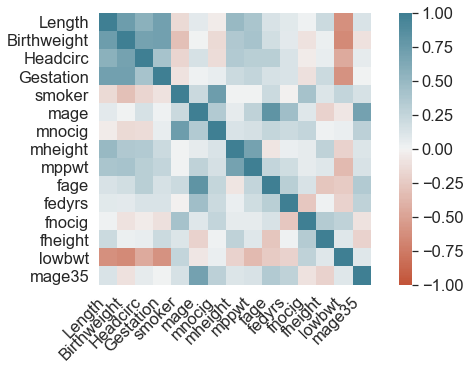

In [38]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

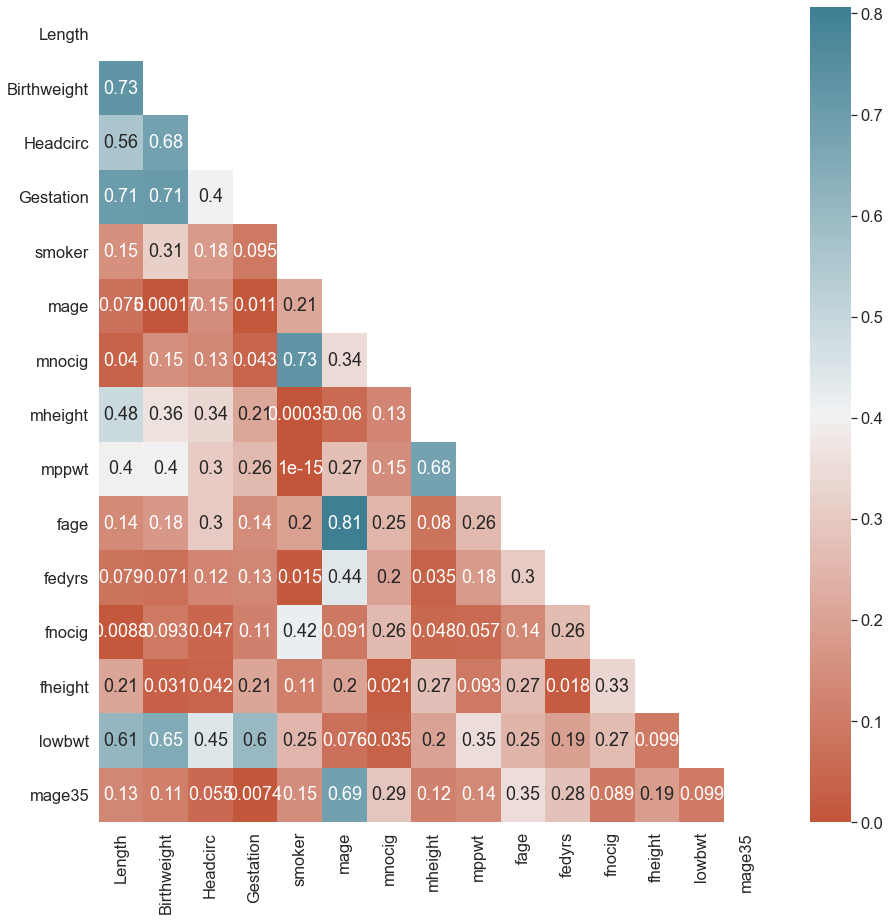

In [39]:
plt.figure(figsize=(15, 15))
corr = df.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=200));

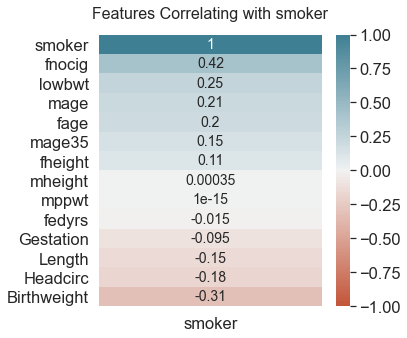

In [121]:
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(df.corr(method='pearson')[[dv]].sort_values(by=dv, ascending=False), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(20, 220, n=200),annot_kws={"fontsize":14})
heatmap.set_title('Features Correlating with {}'.format(dv), fontdict={'fontsize':16}, pad=16);

In [ ]:
corr_columns =['fnocig','lowbwt','mage','fage','Birthweight','Headcirc','Length']

In [ ]:
pd.crosstab(df[dv], df.mnocig)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data.sort_values(by='VIF',ascending=False))

        feature          VIF
7       mheight  1628.086094
0        Length  1319.345164
12      fheight  1203.349929
3     Gestation   722.305305
2      Headcirc   517.480442
5          mage   199.652146
8         mppwt   159.286697
1   Birthweight   144.266304
9          fage   112.521469
10       fedyrs    71.251507
4        smoker     6.098827
6        mnocig     4.528234
14       mage35     4.116659
11       fnocig     3.946293
13       lowbwt     3.215961


In [57]:
#Drop non-usable columns
df.drop(['mnocig'],axis='columns', inplace=True)


In [ ]:
len(df.columns)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Principal Component Analysis (PCA)

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

In [150]:
df[df.columns.difference([dv])].head()

Birthweight  Gestation  Headcirc  Length  fage  fedyrs  fheight  fnocig  \
0         4.55         44        34      56    23      10      179      35   
1         4.32         40        36      53    19      12      183       0   
2         4.10         41        39      58    31      16      185      25   
3         4.07         44        38      53    26      14      189      25   
4         3.94         42        37      54    30      12      184       0   

   lowbwt  mage  mage35  mheight  mppwt  
0       0    20       0      162     57  
1       0    19       0      171     62  
2       0    35       1      172     58  
3       0    20       0      174     68  
4       0    24       0      175     66

In [40]:
X = df[df.columns.difference([dv])]
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo 
chi2,p = calculate_bartlett_sphericity(X)
kmo_vars,kmo_model = calculate_kmo(X)
print("KMO: {}".format(kmo_model))
print("Chi squared value : ",chi2)
print("p value : ",p)#OUTPUT:Bartlett Sphericity TestChi squared value : 4054.19037041082 p value : 0.0

KMO: 0.5818988406579922
Chi squared value :  316.808715345468
p value :  3.503235673064864e-27


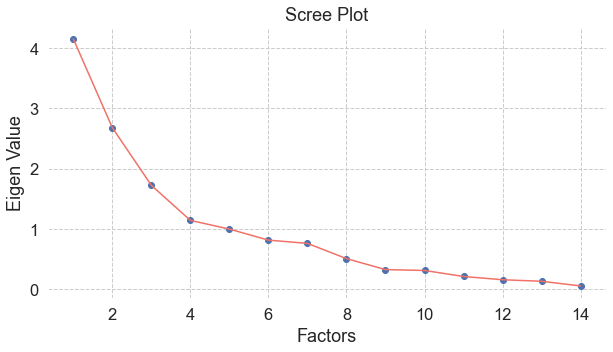

In [55]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=X.shape[1])
fa.fit(X)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev,color=bin_colors[1])
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid(b=True)

In [ ]:
fa = FactorAnalyzer(n_factors=2,rotation='varimax')
fa.fit(X)
print("Rotated Component Matrix")
print(pd.DataFrame(fa.loadings_,index=X.columns))

In [ ]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

In [ ]:
print(pd.DataFrame(fa.get_communalities(),index=X.columns,columns=['Communalities']))

# Model Building

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
#Import ML models t be used
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
df_scaled=df[df.columns.difference([dv])]
df_scaled=pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
df_scaled.head()

Birthweight  Gestation  Headcirc    Length      fage    fedyrs   fheight  \
0     2.073438   1.841546 -0.251044  1.608937 -0.870695 -1.717911 -0.217561   
1     1.687961   0.309963  0.592464  0.574620 -1.460521 -0.780869  0.362602   
2     1.319243   0.692859  1.857726  2.298482  0.308956  1.093216  0.652683   
3     1.268963   1.841546  1.435972  0.574620 -0.428326  0.156174  1.232846   
4     1.051085   1.075754  1.014218  0.919393  0.161500 -0.780869  0.507643   

     fnocig    lowbwt      mage    mage35   mheight     mppwt  
0  1.041439 -0.408248 -0.990915 -0.324443 -0.381625 -0.070302  
1 -1.005240 -0.408248 -1.169535 -0.324443  1.018903  0.632716  
2  0.456674 -0.408248  1.688384  3.082207  1.174517  0.070302  
3  0.456674 -0.408248 -0.990915 -0.324443  1.485746  1.476337  
4 -1.005240 -0.408248 -0.276436 -0.324443  1.641360  1.195130

In [81]:
y = df[dv]
X = df[df.columns.difference([dv])]
X_scaled =  df_scaled
print(X_scaled.shape)
print(X.shape)
print(y.shape)

(42, 13)
(42, 13)
(42,)


In [42]:
X.head()

Birthweight  Gestation  Headcirc  Length  fage  fedyrs  fheight  fnocig  \
0         4.55         44        34      56    23      10      179      35   
1         4.32         40        36      53    19      12      183       0   
2         4.10         41        39      58    31      16      185      25   
3         4.07         44        38      53    26      14      189      25   
4         3.94         42        37      54    30      12      184       0   

   lowbwt  mage  mage35  mheight  mnocig  mppwt  
0       0    20       0      162       0     57  
1       0    19       0      171       0     62  
2       0    35       1      172       0     58  
3       0    20       0      174       0     68  
4       0    24       0      175       0     66

In [ ]:
y.value_counts(normalize=True)

# Model 1 Forced Entry

In [111]:
model_results = {} # Create empty list with models results

## Beginning Block
If no additional information

<br>Percentage acurracy of classification: 52%

============== Results for Forced Entry =================
Accuracy              : 81.82%
ROC_AUC               : 81.67%
KAPPA                 : 63.33%
MacroAVG-Precision    : 81.67%
MacroAVG-Recall       : 81.67%
macroAVG-F1 Score     : 81.67%
Avg CrossValid Score  : 41.43% (5 Folds)
Intercept:  [0.00667313]
Coefficients:
      variables  Coefficients
0   Birthweight     -0.589993
1     Gestation      0.269898
2      Headcirc     -0.137031
3        Length     -0.419058
4          fage      0.085804
5        fedyrs      0.146317
6       fheight      0.001965
7        fnocig      0.054156
8        lowbwt      0.213787
9          mage     -0.032336
10       mage35      0.414220
11      mheight      0.100533
12        mppwt     -0.064286


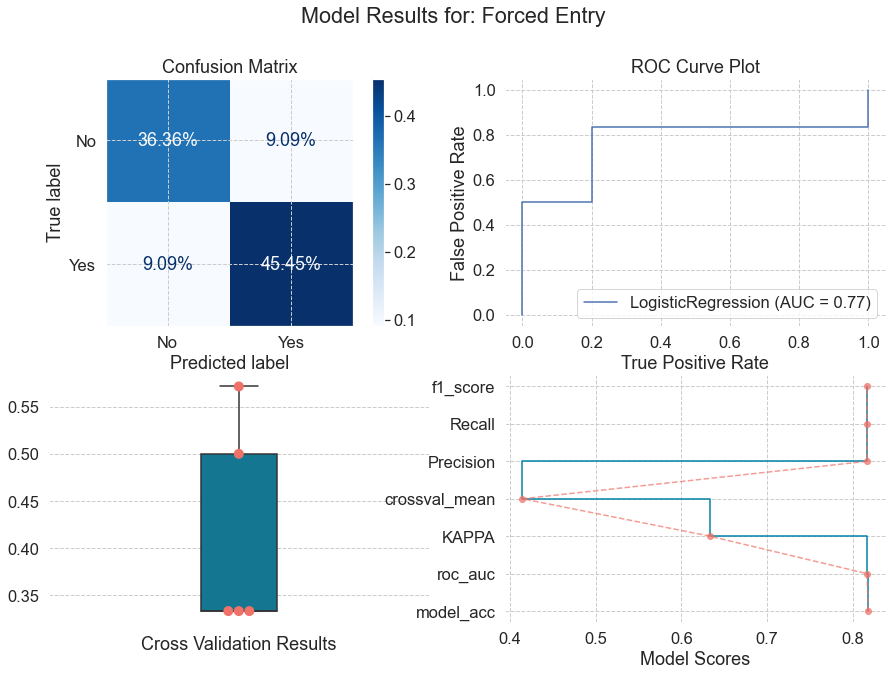

In [112]:
model_results[len(model_results)] = models.run_classification_model(LogisticRegression(),X,y ,desc = 'Forced Entry', labels = dv_labels,verbose=True)

In [ ]:
df.columns

In [ ]:
y = df[dv]
X = df[corr_columns]

============== Results for Forced Entry (Scaled) =================
Accuracy              : 72.73%
ROC_AUC               : 71.67%
KAPPA                 : 44.07%
MacroAVG-Precision    : 73.21%
MacroAVG-Recall       : 71.67%
macroAVG-F1 Score     : 71.79%
Avg CrossValid Score  : 45.24% (5 Folds)
Intercept:  [0.27143733]
Coefficients:
      variables  Coefficients
0   Birthweight     -0.685865
1     Gestation      0.492783
2      Headcirc     -0.260371
3        Length     -0.613386
4          fage      0.369031
5        fedyrs      0.198824
6       fheight     -0.032868
7        fnocig      0.756786
8        lowbwt      0.415306
9          mage     -0.353311
10       mage35      0.525366
11      mheight      0.244280
12        mppwt     -0.129149


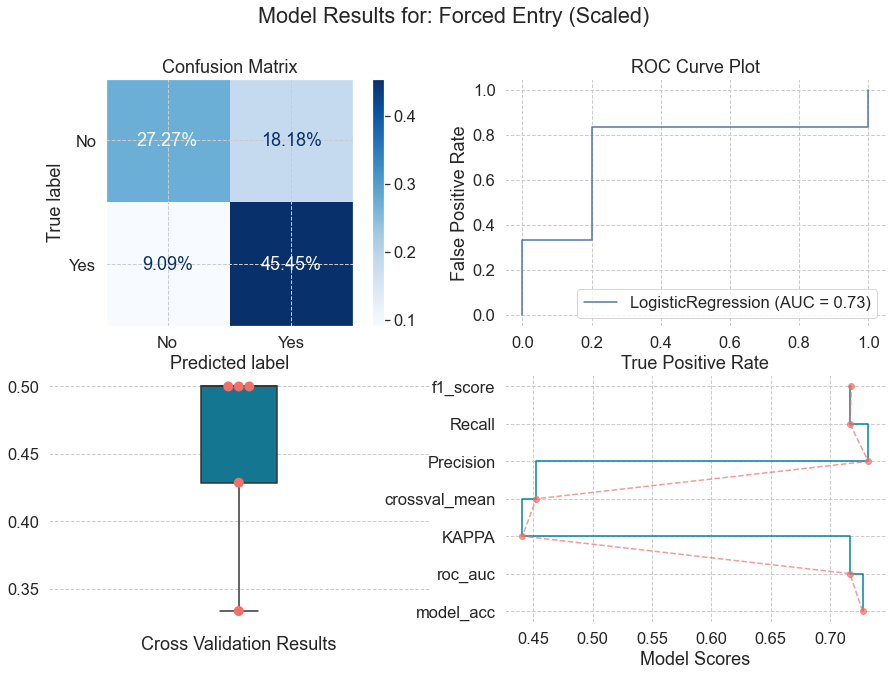

In [113]:
model_results[len(model_results)] = models.run_classification_model(LogisticRegression(),X_scaled,y ,desc = 'Forced Entry (Scaled)', labels = dv_labels,verbose=True)

## Using PCA

Scaling the independent variables

In [ ]:
pd.DataFrame(X_scaled, columns=X.columns).head()

In [86]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_scaled_PCA = pca.transform(X_scaled)
print("original shape:   ", X_scaled.shape)
print("transformed shape:", X_scaled_PCA.shape)
X_scaled_PCA = pd.DataFrame(X_scaled_PCA,columns=['PCA1','PCA2'])

original shape:    (42, 13)
transformed shape: (42, 2)


In [87]:
X_scaled_PCA.head()

PCA1      PCA2
0 -1.472909 -2.463746
1 -1.337906 -2.353293
2 -3.660269  1.721953
3 -2.745066 -1.992508
4 -2.450132 -1.267242

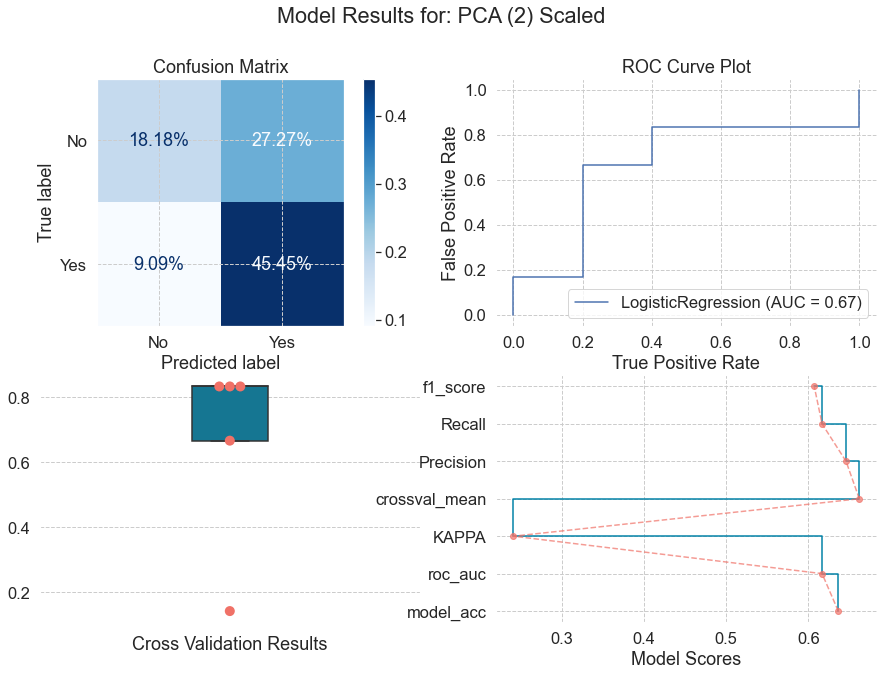

In [88]:
model_results[len(model_results)] = models.run_classification_model(LogisticRegression(),X_scaled_PCA,y ,desc = 'PCA (2) Scaled ', labels = dv_labels)

============== Results for PCA (2 Components) =================
Accuracy              : 90.91%
ROC_AUC               : 90.00%
KAPPA                 : 81.36%
MacroAVG-Precision    : 92.86%
MacroAVG-Recall       : 90.00%
macroAVG-F1 Score     : 90.60%
Avg CrossValid Score  : 58.10% (5 Folds)
Intercept:  [0.11686039]
Coefficients:
  variables  Coefficients
0      PCA1      0.036187
1      PCA2     -0.012066


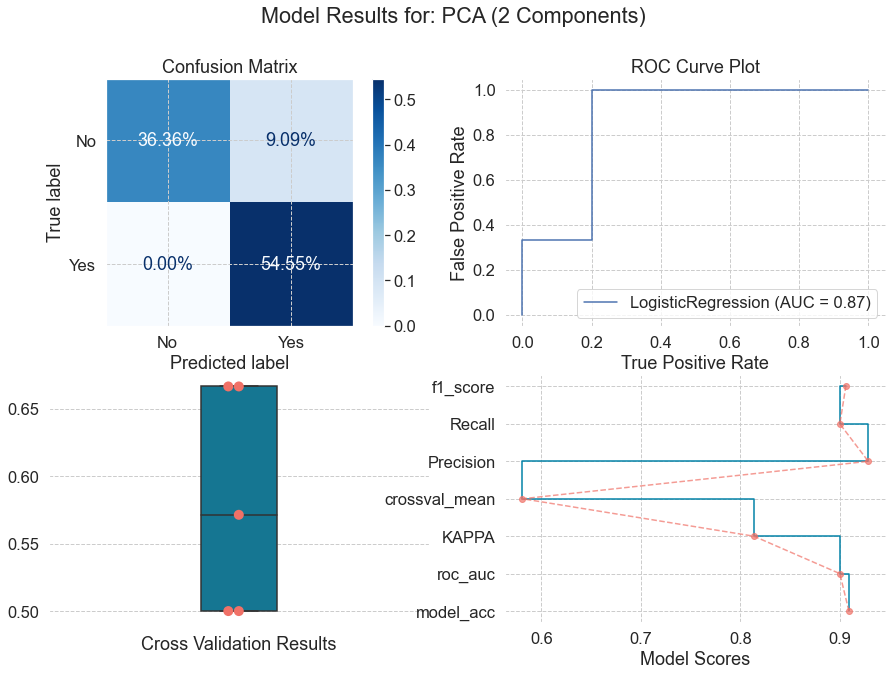

In [114]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pd.DataFrame(pca.transform(X),columns=['PCA1','PCA2'])
model_results[len(model_results)] = models.run_classification_model(LogisticRegression(),X_pca,y ,desc = 'PCA (2 Components)', labels = dv_labels,verbose=True)

============== Results for PCA (3 Components) =================
Accuracy              : 81.82%
ROC_AUC               : 80.00%
KAPPA                 : 62.07%
MacroAVG-Precision    : 87.50%
MacroAVG-Recall       : 80.00%
macroAVG-F1 Score     : 80.36%
Avg CrossValid Score  : 51.90% (5 Folds)
Intercept:  [0.17385822]
Coefficients:
  variables  Coefficients
0      PCA1      0.037570
1      PCA2     -0.017097
2      PCA3      0.031017


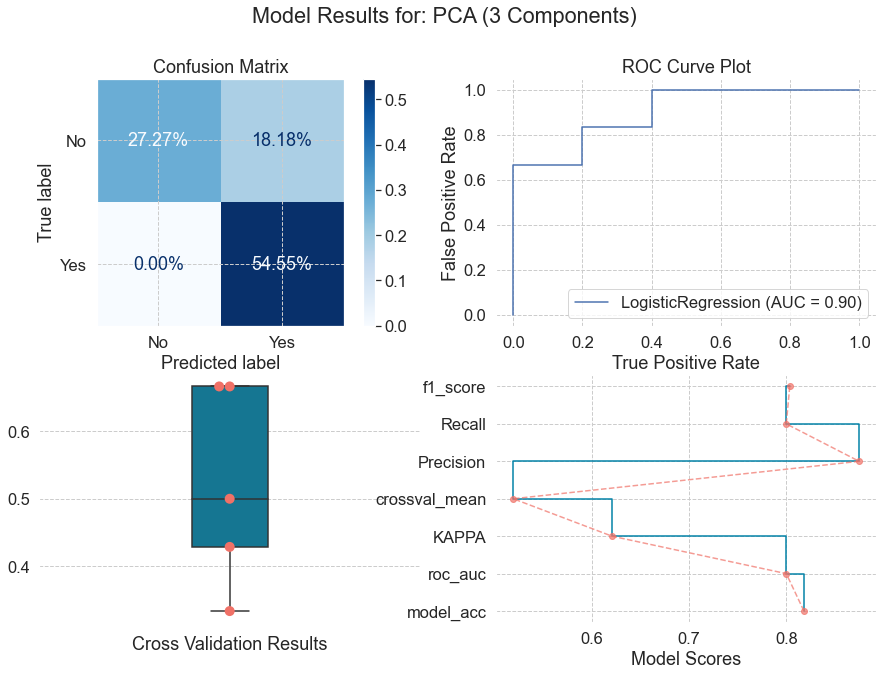

In [115]:
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pd.DataFrame(pca.transform(X),columns=['PCA1','PCA2','PCA3'])
model_results[len(model_results)] = models.run_classification_model(LogisticRegression(),X_pca,y ,desc = 'PCA (3 Components)', labels = dv_labels,verbose=True)

# Model 3 Stepwise

In [116]:
from sklearn.feature_selection import SequentialFeatureSelector

#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X , y , random_state = random_state, shuffle = True, test_size = test_train_split)
clf = LogisticRegression()
# Build step forward feature selection
FeatureSelector = SequentialFeatureSelector(clf,n_features_to_select = 5, direction='forward',cv=cv_n_split)
# Perform SFFS
FeatureSelector = FeatureSelector.fit(X_train, y_train)
selected_features = FeatureSelector.get_support(indices=True)
#X_Fwd_Selection = FeatureSelector.transform(X)

In [117]:
columns =[]
for index in selected_features:
    columns.append(X.columns[index])
X_Fwd_Selection = X[columns]

In [118]:
X_Fwd_Selection.head()

Length  fedyrs  lowbwt  mage  mage35
0      56      10       0    20       0
1      53      12       0    19       0
2      58      16       0    35       1
3      53      14       0    20       0
4      54      12       0    24       0

============== Results for Feature Selector (Fwd) =================
Accuracy              : 63.64%
ROC_AUC               : 65.00%
KAPPA                 : 29.03%
MacroAVG-Precision    : 66.07%
MacroAVG-Recall       : 65.00%
macroAVG-F1 Score     : 63.33%
Avg CrossValid Score  : 58.57% (5 Folds)
Intercept:  [9.9253347]
Coefficients:
  variables  Coefficients
0    Length     -0.218446
1    fedyrs      0.032113
2    lowbwt      0.725581
3      mage      0.032727
4    mage35      0.419477


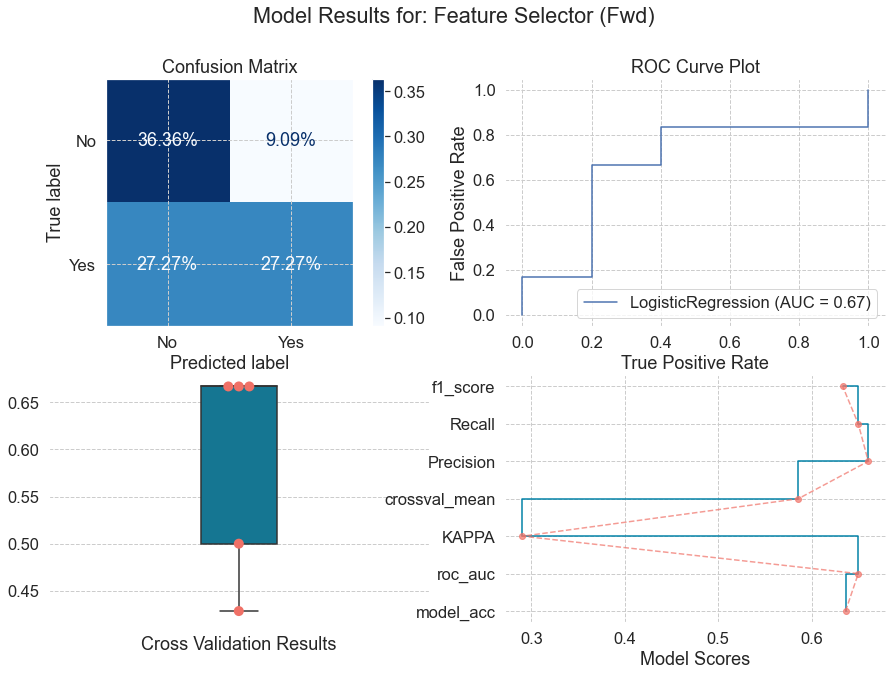

In [119]:
model_results[len(model_results)] = models.run_classification_model(LogisticRegression(),X_Fwd_Selection,y ,desc = 'Feature Selector (Fwd)', labels = dv_labels,verbose=True)

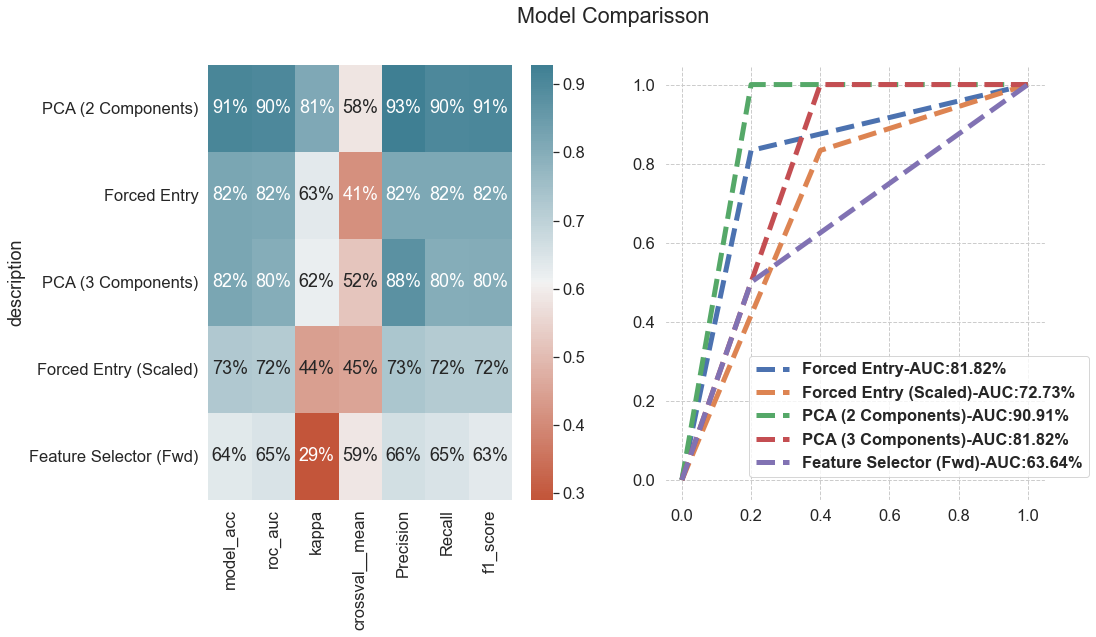

In [120]:
models.printClassificationResults(model_results)

In [ ]:

from sklearn.feature_selection import SequentialFeatureSelector

#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X[X.columns.difference(['mnocig'])] , y , random_state = random_state, shuffle = True, test_size = test_train_split)
clf = LogisticRegression()
# Build step forward feature selection
FeatureSelector = SequentialFeatureSelector(clf,n_features_to_select = 3, direction='forward',cv=cv_n_split)
# Perform SFFS
FeatureSelector = FeatureSelector.fit(X_train, y_train)
selected_features = FeatureSelector.get_support(indices=True)
#X_Fwd_Selection = FeatureSelector.transform(X)

In [ ]:
columns =[]
for index in selected_features:
    columns.append(X.columns[index])
X_Fwd_Selection = X[columns]

In [ ]:
X_Fwd_Selection.head()

In [ ]:
model_results[len(model_results)] = models.run_classification_model(LogisticRegression(),X_Fwd_Selection,y ,desc = 'Feature Selector - VIF', labels = dv_labels,verbose=True)

In [ ]:
models.printClassificationResults(model_results)

In [ ]:
import statsmodels.api as sm
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X_Fwd_Selection,y  , random_state = random_state, shuffle = True, test_size = test_train_split)


In [ ]:
y_train.shape

In [ ]:
X_train.shape

In [ ]:

log_reg = sm.Logit(y_train, X_train)
result = log_reg.fit()
#print(log_reg.summary())

In [ ]:
type(plt.cm.Blues)

In [ ]:
X.head()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data.sort_values(by='VIF',ascending=False))

In [ ]:
from sklearn.feature_selection import RFE
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_


selector.ranking_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [ ]:
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
#plot_examples([viridis, newcmp])

In [ ]:
newcmp